# Monthly Report Feb. 2018 

In [1]:

import sqlite3
import pandas as pd
from pandas import DataFrame, Series

conn_sales = sqlite3.connect('Sales.db')

In [2]:
# Global Parameter

year_val = 2018
mon_val = 3
png_save_dir = 'DBDFMR_201803'

# 총괄 판매량 

In [3]:
sql_sales = '''
                select year, month, sum(amount) as 'Total'
                from sales
                where year = {0} and month = {1};
'''.format(year_val, mon_val)
DF_Tsales = pd.read_sql_query(sql_sales, conn_sales)
DF_Tsales = DF_Tsales.set_index(['year', 'month'])

sql_lsales = """
                select year, month, sum(amount) as 'Lager'
                from sales
                where (year = {0} and month = {1})
                and (cat2 = 21 or cat2 = 61);
""".format(year_val, mon_val)
DF_Lsales = pd.read_sql_query(sql_lsales, conn_sales)
DF_Lsales = DF_Lsales.set_index(['year', 'month'])

sql_asales = """
                select year, month, sum(amount) as 'Ale'
                from sales
                where (year = {0} and month = {1})
                and (cat2 = 22 or cat2 = 62);
""".format(year_val, mon_val)
DF_Asales = pd.read_sql_query(sql_asales, conn_sales)
DF_Asales = DF_Asales.set_index(['year', 'month'])
sql_fsales = """
                select year, month, sum(amount) as 'Food'
                from sales
                where (year = {0} and month = {1})
                and (cat2 = 31 or cat2 = 30);
""".format(year_val, mon_val)
DF_Fsales = pd.read_sql_query(sql_fsales, conn_sales)
DF_Fsales = DF_Fsales.set_index(['year', 'month'])

sql_csales = """
                select year, month, sum(amount) as 'Chicken'
                from sales
                where (year = {0} and month = {1})
                and (cat2 = 35 or cat2 = 36 or cat2 = 37);
""".format(year_val, mon_val)
DF_Csales = pd.read_sql_query(sql_csales, conn_sales)
DF_Csales = DF_Csales.set_index(['year', 'month'])

DF_sales = pd.concat([DF_Tsales, DF_Lsales, DF_Asales, DF_Fsales, DF_Csales], axis=1)
DF_sales.T

year,2018
month,3
Total,31826400
Lager,7979600
Ale,11987300
Food,6717000
Chicken,5142500


In [4]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [5]:
matplotlib.matplotlib_fname()

u'C:\\ProgramData\\Anaconda2\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

In [6]:
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()

[]

In [7]:
font_name = matplotlib.font_manager.FontProperties(fname=u"c:/Windows/Fonts/rix고딕M.ttf").get_name()

matplotlib.rc('font', family=font_name)

In [8]:

#plt.rcParams["font.family"] = 'AppleMyungjo'
plt.rcParams["font.family"] = font_name

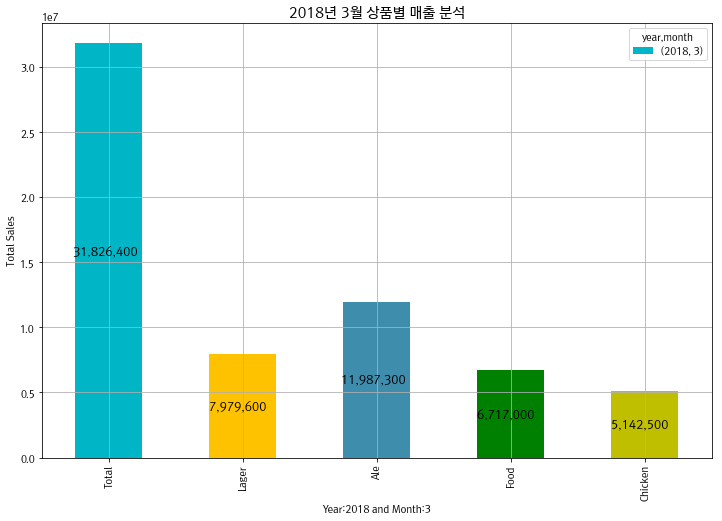

In [9]:

fig = plt.figure()
my_colors = ['#00B5C5','#FEC200','#3E8DAC', 'g', 'y','r']
ax = DF_sales.T.plot.bar(stacked=False, figsize=(12,8), grid=True, color=my_colors)

plt.rcParams['font.size'] = 12
plt.title(u'{0}년 {1}월 상품별 매출 분석'.format(year_val, mon_val))

ax.set_xlabel('Year:{0} and Month:{1}'.format(year_val, mon_val))
ax.set_ylabel('Total Sales')


labels = []

for i in DF_sales.index:
    for j in DF_sales.columns:
        value_str = u"{:<12,}".format(int(DF_sales.loc[i][j])) 
        labels.append(value_str)

#print labels

patches = ax.patches
for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
#        csv = "{:<12,}".format(int(label))
        ax.text(x + width/2., y + height/2.-0.01, label, ha='center', va='center', fontsize=12)

fig  = ax.get_figure()
fig.savefig('PNG/{0}/1-1-Sales-Total.png'.format(png_save_dir))
plt.show()




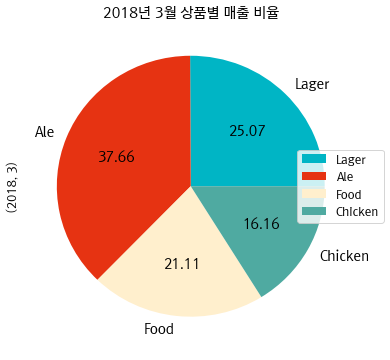

In [10]:
fig = plt.figure()

my_colors = ['#00B5C5', '#E63312','#FFEFCD','#4FAAA1', '#659353', 'g', '#FEC200','y']
ax = DF_sales[['Lager','Ale','Food','Chicken']].T.plot.\
    pie(subplots=True, figsize=(6,6), autopct='%.2f', fontsize=14, colors=my_colors)

plt.rcParams['font.size'] = 12

plt.title(u'{0}년 {1}월 상품별 매출 비율'.format(year_val, mon_val))
        
plt.legend(loc='center left', bbox_to_anchor=(0.8, 0.5))
fig = ax[0].get_figure()
fig.savefig('PNG/{0}/1-2-Sales-Rate.png'.format(png_save_dir))
plt.show()

# Food Sales

In [11]:
sql_food = """
            select year, month, pname, amount as sales
            from sales
            where cat1 = 3 and year = {0} and month = {1};
""".format(year_val, mon_val)
DF_food = pd.read_sql_query(sql_food, conn_sales)

DF_food_graph = DF_food.set_index('pname')
DF_food_graph
DF_food

,year,month,pname,sales
0,2018,3,콜라,145000
1,2018,3,사이다,188000
2,2018,3,뻘건감자,520000
3,2018,3,촉촉오징어땅콩,1030000
4,2018,3,골빔면,378000
5,2018,3,허연감자,1102000
6,2018,3,스팸튀김,225000
7,2018,3,앵그리버드,1277197
8,2018,3,크리스피텐더,1362000
9,2018,3,버팔로윙,630000


C:\ProgramData\Anaconda2\lib\site-packages\pandas\plotting\_core.py:178: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


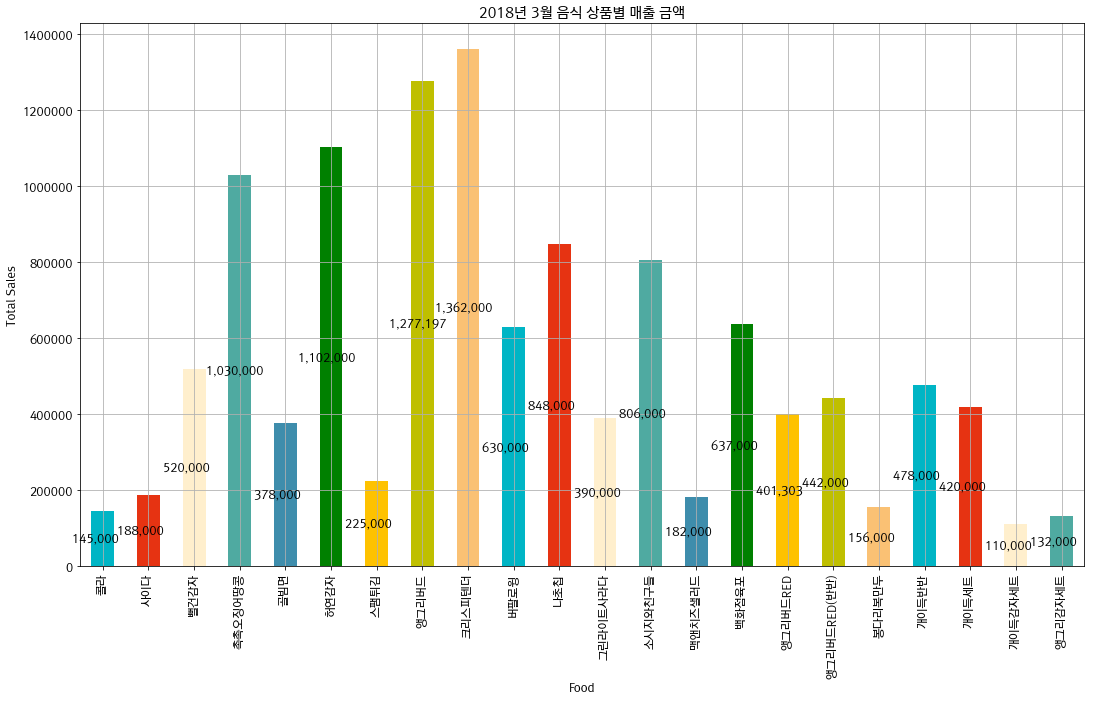

In [12]:
fig = plt.figure()
my_colors = ['#00B5C5', '#E63312','#FFEFCD','#4FAAA1', '#3E8DAC', 'g', '#FEC200','y','#FAC174']
ax = DF_food_graph['sales'].plot.bar(stacked=False, figsize=(18,10), grid=True, colors=my_colors)

plt.rcParams['font.size'] = 12
plt.title(u'{0}년 {1}월 음식 상품별 매출 금액'.format(year_val, mon_val))


ax.set_xlabel('Food')
ax.set_ylabel('Total Sales')

labels = []
for i in DF_food_graph.index:
        value_str = u"{:<12,}".format(int(DF_food_graph.loc[i]['sales'])) 
        labels.append(value_str)
#print labels

patches = ax.patches
for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2.-0.01, label, ha='center', va='center', fontsize=12)

fig  = ax.get_figure()
fig.savefig('PNG/{0}/1-3-Food-Sales-Total.png'.format(png_save_dir))
plt.show()

# Beer Sales

In [13]:
sql_beer = """
            select year, month, pname, amount as sales
            from sales
            where year = {0} and month = {1} and cat1 = 2 ;
""".format(year_val, mon_val)
DF_BS1 = pd.read_sql_query(sql_beer, conn_sales)
sql_beer = """
            select year, month, pname, amount as sales
            from sales
            where year = {0} and month = {1} and cat1 = 6 ;
""".format(year_val, mon_val)
DF_BS2 = pd.read_sql_query(sql_beer, conn_sales)
DF_BS1 = DF_BS1.set_index('pname')
DF_BS2 = DF_BS2.set_index('pname')

#DF_BS1, DF_BS2

In [14]:
#DF_BS1.loc[u'생활밀착', 'sales'] += DF_BS2.loc[u'CAN 생활밀착']['sales']
DF_BS1.loc[u'브랜든밀맥주', 'sales'] += DF_BS2.loc[u'CAN 브랜든밀맥주']['sales']
DF_BS1.loc[u'놀라운에일', 'sales'] += DF_BS2.loc[u'CAN 놀라운']['sales']
DF_BS1.loc[u'레드락IPA', 'sales'] += DF_BS2.loc[u'CAN 레드락IPA']['sales']
DF_BS1.loc[u'레드락라거', 'sales'] += DF_BS2.loc[u'CAN 진짜500']['sales']
DF_BS1.loc[u'모카스타우트', 'sales'] += DF_BS2.loc[u'CAN 모카스타우트']['sales']
DF_BS1.loc[u'강남페일에일', 'sales'] += DF_BS2.loc[u'CAN 강남']['sales']
DF_BS1.loc[u'걸작IPA', 'sales'] += DF_BS2.loc[u'CAN 걸작IPA']['sales']
DF_BS1.loc[u'일상탈출', 'sales'] += DF_BS2.loc[u'CAN 일상탈출']['sales']
DF_BS1.loc[u'설레임', 'sales'] += DF_BS2.loc[u'CAN 설레임']['sales']
DF_BS1.loc[u'하와이안골든에일', 'sales'] += DF_BS2.loc[u'CAN 하와이안골든에일']['sales']

DF_BS1

,year,month,sales
pname,,,
샘플러5종,2018,3,2110000
브랜든밀맥주,2018,3,1470800
놀라운에일,2018,3,1410000
레드락IPA,2018,3,146500
레드락라거,2018,3,7979600
모카스타우트,2018,3,1819000
슬로우IPA,2018,3,0
강남페일에일,2018,3,1508000
걸작IPA,2018,3,1052000


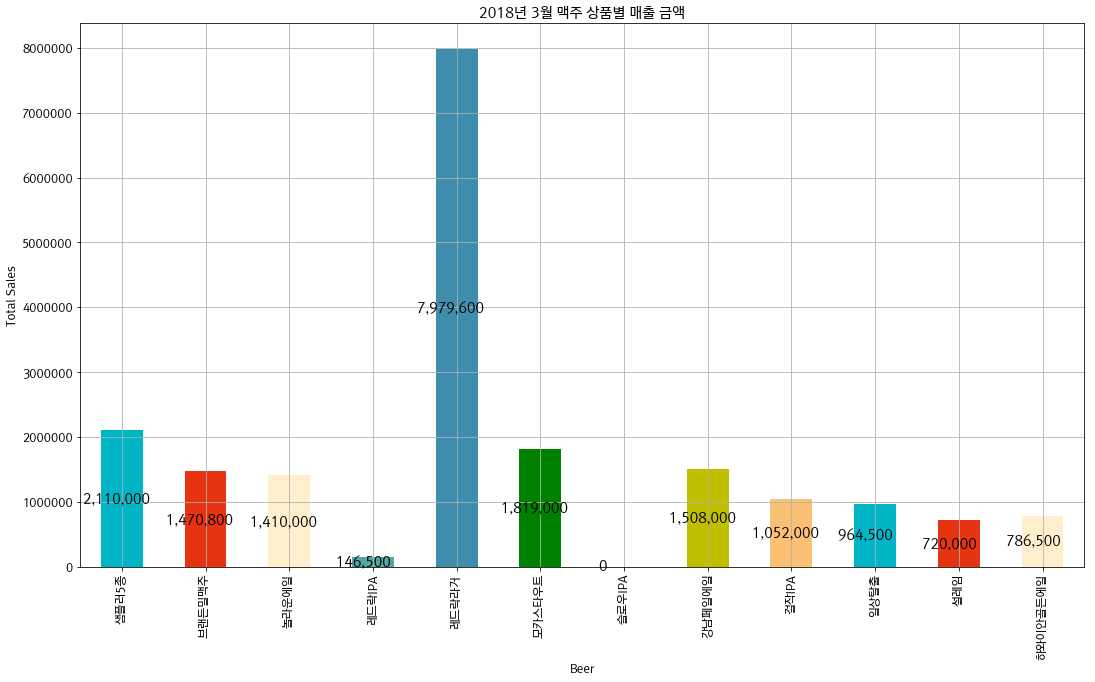

In [15]:
fig = plt.figure()
my_colors = ['#00B5C5', '#E63312','#FFEFCD','#4FAAA1', '#3E8DAC', 'g', '#FEC200','y','#FAC174']
ax = DF_BS1['sales'].plot.bar(stacked=False, figsize=(18,10), grid=True, colors=my_colors)

plt.rcParams['font.size'] = 12
plt.title(u'{0}년 {1}월 맥주 상품별 매출 금액'.format(year_val, mon_val))


ax.set_xlabel('Beer')
ax.set_ylabel('Total Sales')

labels = []
for i in DF_BS1.index:
        value_str = u"{:<12,}".format(int(DF_BS1.loc[i]['sales'])) 
        labels.append(value_str)
#print labels

patches = ax.patches
for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2.-0.01, label, ha='center', va='center', fontsize=14)

fig  = ax.get_figure()
fig.savefig('PNG/{0}/1-4-Beer-Sales.png'.format(png_save_dir))
plt.show()

# 2. Sell/Buy

## 2.1 Total Sell/Buy  

In [41]:
# 총매출 : 음식매입 : 맥주매입
sql_stmt = """
            select year, month, sum(amount) as total_sales
            from sales
            where year = {0} and month = {1}
""".format(year_val, mon_val)
DF_TS = pd.read_sql_query(sql_stmt, conn_sales)
sql_stmt = """
            select year, month, sum(amount) as Beer_Buy
            from beer
            where year = {0} and month = {1}
""".format(year_val, mon_val)
DF_BB = pd.read_sql_query(sql_stmt, conn_sales)
sql_stmt = """
            select year, month, sum(total) as CJ_Buy
            from OrderAll
            where year = {0} and month = {1}
""".format(year_val, mon_val)
DF_CJBUY = pd.read_sql_query(sql_stmt, conn_sales)
DF_TSB = DataFrame()
DF_TSB.loc['Beer_Buy','Amount'] = DF_BB.loc[0]['Beer_Buy']
DF_TSB.loc['CJ_Buy','Amount'] = DF_CJBUY.loc[0]['CJ_Buy']
DF_TSB.loc['Sale-(CJ+B)', 'Amount'] = DF_TS.loc[0]['total_sales'] - ( DF_BB.loc[0]['Beer_Buy'] + DF_CJBUY.loc[0]['CJ_Buy'])

#DF_TS
DF_TSB

,Amount
Beer_Buy,6627700.0
CJ_Buy,4607460.0
Sale-(CJ+B),20591240.0


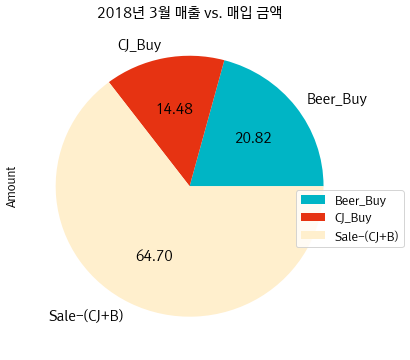

In [17]:
fig = plt.figure()

my_colors = ['#00B5C5', '#E63312','#FFEFCD','#4FAAA1', '#659353', 'g', '#FEC200','y']
ax = DF_TSB.plot.\
    pie(subplots=True, figsize=(6,6), autopct='%.2f', fontsize=14, colors=my_colors)

plt.rcParams['font.size'] = 12

plt.title(u'{0}년 {1}월 매출 vs. 매입 금액'.format(year_val, mon_val))
        
plt.legend(loc='center left', bbox_to_anchor=(0.8, 0.4))
fig = ax[0].get_figure()
fig.savefig('PNG/{0}/2-1-Total-Sales-Buy.png'.format(png_save_dir))
plt.show()

## Sell:Buy %

In [18]:
sql_stmt = """
            select year, month, sum(amount) as Sale
            from sales
            where year = {0} and month = {1} and cat1 = 3;
""".format(year_val, mon_val)
DF_CJBS = pd.read_sql_query(sql_stmt, conn_sales)
DF_CJBS.loc[0, 'Buy'] = DF_CJBUY.loc[0]['CJ_Buy']
DF_CJBS = DF_CJBS.rename(index={0: 'CJ'})

sql_stmt = """
            select year, month, sum(amount) as Sale
            from sales
            where (year = {0} and month = {1}) and (cat1 = 2 or cat1 = 6);
""".format(year_val, mon_val)
DF_BBS = pd.read_sql_query(sql_stmt, conn_sales)
DF_BBS.loc[0, 'Buy'] = DF_BB.loc[0]['Beer_Buy'] 
DF_BBS = DF_BBS.rename(index={0: 'Beer'})

DF_BuySell = pd.concat([DF_BBS, DF_CJBS], axis=0)
DF_BuySell['rate'] = DF_BuySell['Buy'] / DF_BuySell['Sale'] * 100
DF_BuySell


,year,month,Sale,Buy,rate
Beer,2018,3,19966900,6627700.0,33.193435
CJ,2018,3,11859500,4607460.0,38.850373


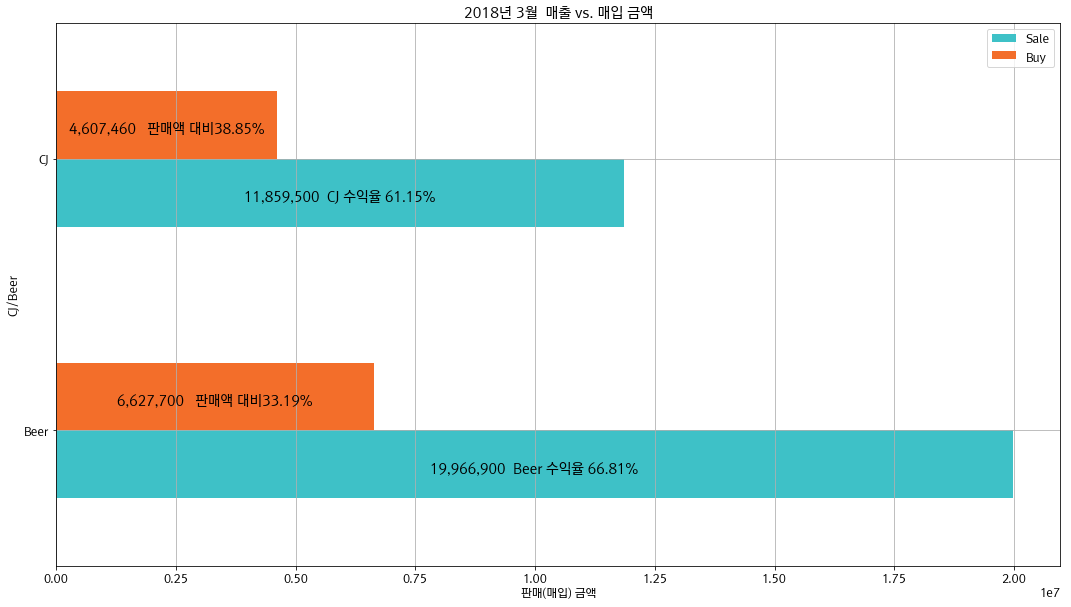

In [36]:
fig = plt.figure()
#my_colors = ['#3E8DAC', 'g', '#FEC200','y','#FAC174','#25A2A6','#68C4AF']
#my_colors = ['#00B5C5', '#E63312','#FFEFCD','#4FAAA1', '#FEC200','#68C4AF']
#my_colors = ['#FEC200','#68C4AF']
my_colors = ['#3EC1C7','#F36E2A']


ax = DF_BuySell[['Sale','Buy']].plot.barh(stacked=False, figsize=(18,10), grid=True, colors=my_colors)


plt.rcParams['font.size'] = 12
plt.title(u'{0}년 {1}월  매출 vs. 매입 금액'.format(year_val, mon_val))



ax.set_xlabel(u'판매(매입) 금액')
ax.set_ylabel('CJ/Beer')

labels = []
for j in DF_BuySell[['Sale','Buy']].columns:
    for i in DF_BuySell.index:
        value_str = u"{:<12,}".format(int(DF_BuySell.loc[i][j])) 
        if j == 'Buy':
            value_str += u"판매액 대비{0:.4}%".format(DF_BuySell.loc[i]['rate'])
        else:
            value_str += u"{1} 수익율 {0:.4}%".format(100 - DF_BuySell.loc[i]['rate'], i)
        labels.append(value_str)
#print labels

patches = ax.patches
for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2.-0.01, label, ha='center', va='center', fontsize=14)

fig  = ax.get_figure()
fig.savefig('PNG/{0}/2-2-0-BeerCJ-SalesandBuy.png'.format(png_save_dir))
plt.show()

## 2.2 Food Sales/Buy

In [20]:
# -------------------------------------------------------------------------
## Angry + RED + Half and Half
DF_food.loc[7, 'sales'] += DF_food.loc[15,'sales'] + DF_food.loc[16, 'sales'] + DF_food.loc[18, 'sales'] + DF_food.loc[19, 'sales'] + DF_food.loc[21, 'sales']
DF_food = DF_food.drop([15,16,18,19,20,21])

In [21]:

# -----------------------------------------------------------------------------
# [0] 100743 콜라
indno = 0
sql_stmt = "select sum(total) from orderall where year={0} and month={1} and sku=100743".format(year_val, mon_val)
cursor = conn_sales.cursor()
cursor.execute(sql_stmt)
tuples = cursor.fetchone()
total = tuples[0]
DF_food.loc[indno, 'buy'] = total

# -----------------------------------------------------------------------------
# [1] 100744 사이다
indno = 1
sql_stmt = "select sum(total) from orderall where year={0} and month={1} and sku=100744".format(year_val, mon_val)
cursor = conn_sales.cursor()
cursor.execute(sql_stmt)
tuples = cursor.fetchone()
total = tuples[0]
DF_food.loc[indno, 'buy'] = total

# -----------------------------------------------------------------------------
# [2] 251901 빨간감자 + 양파드레싱 + 케찹
indno = 2
sql_stmt = "select sum(total) from orderall where (year={0} and month={1}) and (sku=251901 or sku=215140 or sku=160016)".format(year_val, mon_val)
cursor = conn_sales.cursor()
cursor.execute(sql_stmt)
tuples = cursor.fetchone()
total = tuples[0]
DF_food.loc[indno, 'buy'] = total

# -----------------------------------------------------------------------------
# [3] 오징어 + 땅콩
indno = 3
sql_stmt = "select sum(total) from orderall where (year={0} and month={1}) and (sku=232931 or sku = 206578)".format(year_val, mon_val)
cursor = conn_sales.cursor()
cursor.execute(sql_stmt)
tuples = cursor.fetchone()
total = tuples[0]
DF_food.loc[indno, 'buy'] = total

# -----------------------------------------------------------------------------
# [4] 비빔면 + 골뱅이
indno = 4
sql_stmt = "select sum(total) from orderall where (year={0} and month={1}) and (sku=171838 or sku = 163815)".format(year_val, mon_val)
cursor = conn_sales.cursor()
cursor.execute(sql_stmt)
tuples = cursor.fetchone()
total = tuples[0]
DF_food.loc[indno, 'buy'] = total

# -----------------------------------------------------------------------------
# [5] 251902 허연감자 + 양파드레싱 + 케찹
indno = 5
sql_stmt = "select sum(total) from orderall where (year={0} and month={1}) and (sku=251902 or sku=215140 or sku=160016)".format(year_val, mon_val)
cursor = conn_sales.cursor()
cursor.execute(sql_stmt)
tuples = cursor.fetchone()
total = tuples[0]
DF_food.loc[indno, 'buy'] = total

# -----------------------------------------------------------------------------
# [6] 118232 Spam
indno = 6
sql_stmt = "select sum(total) from orderall where year={0} and month={1} and sku=118232".format(year_val, mon_val)
cursor = conn_sales.cursor()
cursor.execute(sql_stmt)
tuples = cursor.fetchone()
total = tuples[0]
DF_food.loc[indno, 'buy'] = total


# -----------------------------------------------------------------------------
# [7] Angry + [15] Red + [16] H and H
# [7] 앵그리 + 파우더 + 레드소스 
indno = 7
#sql_stmt = "select sum(total) from orderall where (year={0} and month={1}) and (sku=424782 or sku=166412 or sku=247491 or sku=145970)".format(year_val, mon_val)
sql_stmt = "select sum(total) from orderall where (year={0} and month={1}) and (sku=424782 or sku=166412 or sku=247491)".format(year_val, mon_val)
cursor = conn_sales.cursor()
cursor.execute(sql_stmt)
tuples = cursor.fetchone()
total = tuples[0]
DF_food.loc[indno, 'buy'] = total


# -----------------------------------------------------------------------------
# [8] Krispy + 웨지감자 
indno = 8
sql_stmt = "select sum(total) from orderall where (year={0} and month={1}) and (sku=424783 or sku=140440)".format(year_val, mon_val)
cursor = conn_sales.cursor()
cursor.execute(sql_stmt)
tuples = cursor.fetchone()
total = tuples[0]
DF_food.loc[indno, 'buy'] = total


# -----------------------------------------------------------------------------
# [9] Buff 
indno = 9
sql_stmt = "select sum(total) from orderall where (year={0} and month={1}) and (sku=115722 or sku=140440)".format(year_val, mon_val)
cursor = conn_sales.cursor()
cursor.execute(sql_stmt)
tuples = cursor.fetchone()
total = tuples[0]
DF_food.loc[indno, 'buy'] = total


# -----------------------------------------------------------------------------
# [10] Nacho + 살사소스 + 치즈소스
indno = 10
sql_stmt = "select sum(total) from orderall where (year={0} and month={1}) and (sku=116709 or sku = 115364 or sku = 119863)".format(year_val, mon_val)
cursor = conn_sales.cursor()
cursor.execute(sql_stmt)
tuples = cursor.fetchone()
total = tuples[0]
DF_food.loc[indno, 'buy'] = total


# -----------------------------------------------------------------------------
# [11] Green Light Salad
indno = 11
sql_stmt = "select sum(total) from orderall where (year={0} and month={1}) and (sku=169394)".format(year_val, mon_val)
cursor = conn_sales.cursor()
cursor.execute(sql_stmt)
tuples = cursor.fetchone()
total = tuples[0]
DF_food.loc[indno, 'buy'] = total


# -----------------------------------------------------------------------------
# [12] Sausage + Egg
indno = 12
sql_stmt = "select sum(total) from orderall where (year={0} and month={1}) and (sku=176689 or sku=401354)".format(year_val, mon_val)
cursor = conn_sales.cursor()
cursor.execute(sql_stmt)
tuples = cursor.fetchone()
total = tuples[0]
DF_food.loc[indno, 'buy'] = total


# -----------------------------------------------------------------------------
# [13] Mac and Cheese + 케이준드레싱 + 샐러드믹스
indno = 13
sql_stmt = "select sum(total) from orderall where (year={0} and month={1}) and (sku=124531 or sku=215139 or sku=169394)".format(year_val, mon_val)
cursor = conn_sales.cursor()
cursor.execute(sql_stmt)
tuples = cursor.fetchone()
total = tuples[0]
DF_food.loc[indno, 'buy'] = total



# -----------------------------------------------------------------------------
# [14] 64 + 땅콩 + 건포도
indno = 14
sql_stmt = "select sum(total) from orderall where (year={0} and month={1}) and (sku=201934 or sku=206578 or sku=242910 )".format(year_val, mon_val)
cursor = conn_sales.cursor()
cursor.execute(sql_stmt)
tuples = cursor.fetchone()
total = tuples[0]
DF_food.loc[indno, 'buy'] = total

# [15],[16] drop

# -----------------------------------------------------------------------------
# [17] dimsum
indno = 17
sql_stmt = "select sum(total) from orderall where (year={0} and month={1}) and (sku=140440 )".format(year_val, mon_val)
cursor = conn_sales.cursor()
cursor.execute(sql_stmt)
tuples = cursor.fetchone()
total = tuples[0]
DF_food.loc[indno, 'buy'] = total


In [22]:
DF_food_graph2 = DF_food.set_index('pname')
DF_food_graph2 = DF_food_graph2[['sales','buy']]
DF_food_graph2

,sales,buy
pname,,
콜라,145000,35904.0
사이다,188000,30782.0
뻘건감자,520000,245586.0
촉촉오징어땅콩,1030000,468700.0
골빔면,378000,146520.0
허연감자,1102000,403282.0
스팸튀김,225000,83160.0
앵그리버드,3150500,1171665.0
크리스피텐더,1362000,610016.0


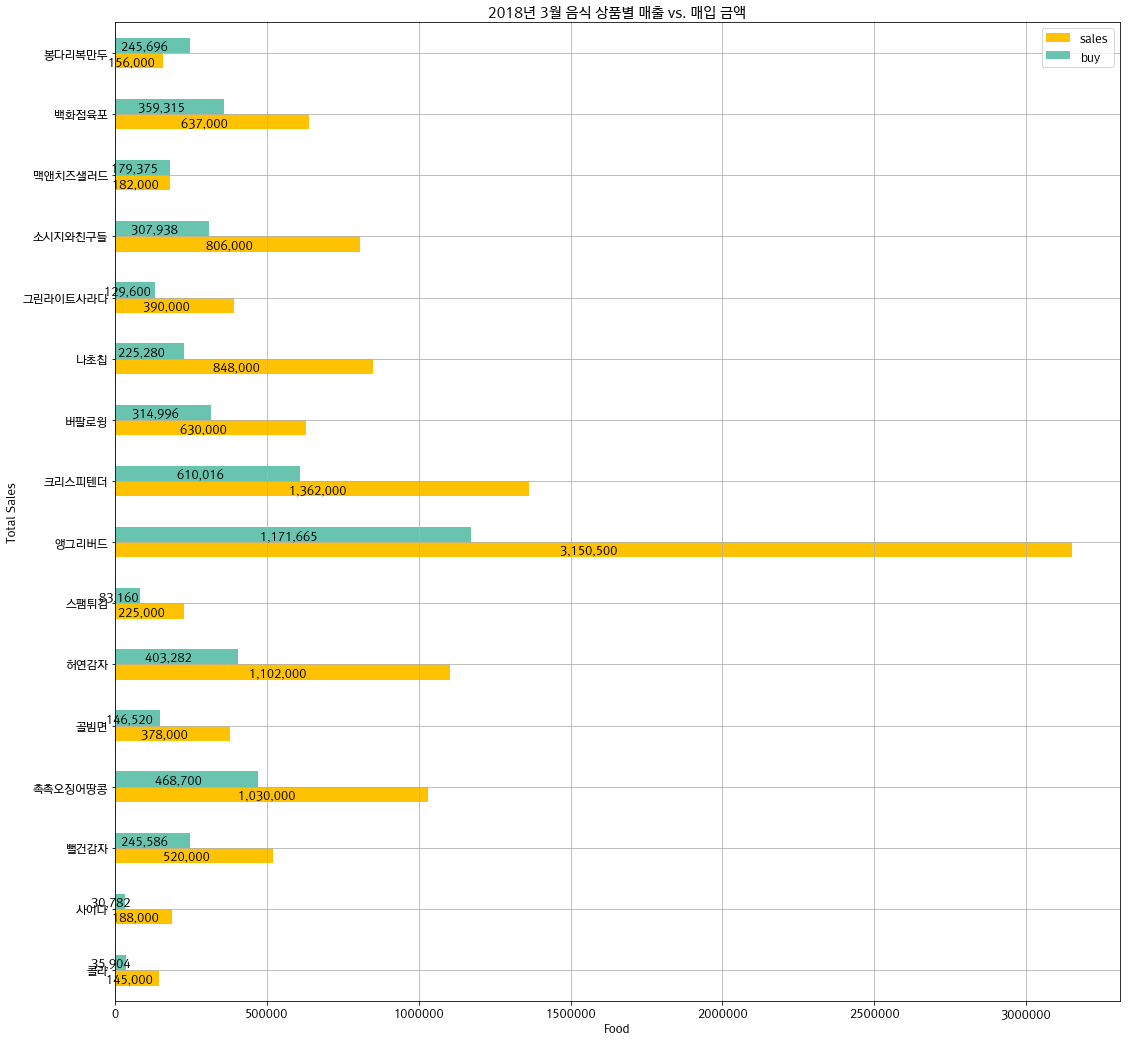

In [23]:
 fig = plt.figure()
#my_colors = ['#3E8DAC', 'g', '#FEC200','y','#FAC174','#25A2A6','#68C4AF']
#my_colors = ['#00B5C5', '#E63312','#FFEFCD','#4FAAA1', '#FEC200','#68C4AF']
my_colors = ['#FEC200','#68C4AF']


ax = DF_food_graph2.plot.barh(stacked=False, figsize=(18,18), grid=True, colors=my_colors)


plt.rcParams['font.size'] = 12
plt.title(u'{0}년 {1}월 음식 상품별 매출 vs. 매입 금액'.format(year_val, mon_val))



ax.set_xlabel('Food')
ax.set_ylabel('Total Sales')

labels = []
for j in DF_food_graph2.columns:
    for i in DF_food_graph2.index:
        value_str = u"{:<12,}".format(int(DF_food_graph2.loc[i][j])) 
        labels.append(value_str)
#print labels

patches = ax.patches
for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2.-0.01, label, ha='center', va='center', fontsize=12)

fig  = ax.get_figure()
fig.savefig('PNG/{0}/2-2-1-Food-SalesandBuy.png'.format(png_save_dir))
plt.show()

In [24]:
DF_food['prate'] = 100 - (DF_food['buy']/DF_food['sales'] * 100)
DF_food_graph3 = DF_food.set_index('pname')
DF_food_graph3 = DF_food_graph3.drop(u'봉다리복만두')
DF_food_graph3


,year,month,sales,buy,prate
pname,,,,,
콜라,2018,3,145000,35904.0,75.238621
사이다,2018,3,188000,30782.0,83.626596
뻘건감자,2018,3,520000,245586.0,52.771923
촉촉오징어땅콩,2018,3,1030000,468700.0,54.495146
골빔면,2018,3,378000,146520.0,61.238095
허연감자,2018,3,1102000,403282.0,63.404537
스팸튀김,2018,3,225000,83160.0,63.040000
앵그리버드,2018,3,3150500,1171665.0,62.810189
크리스피텐더,2018,3,1362000,610016.0,55.211747


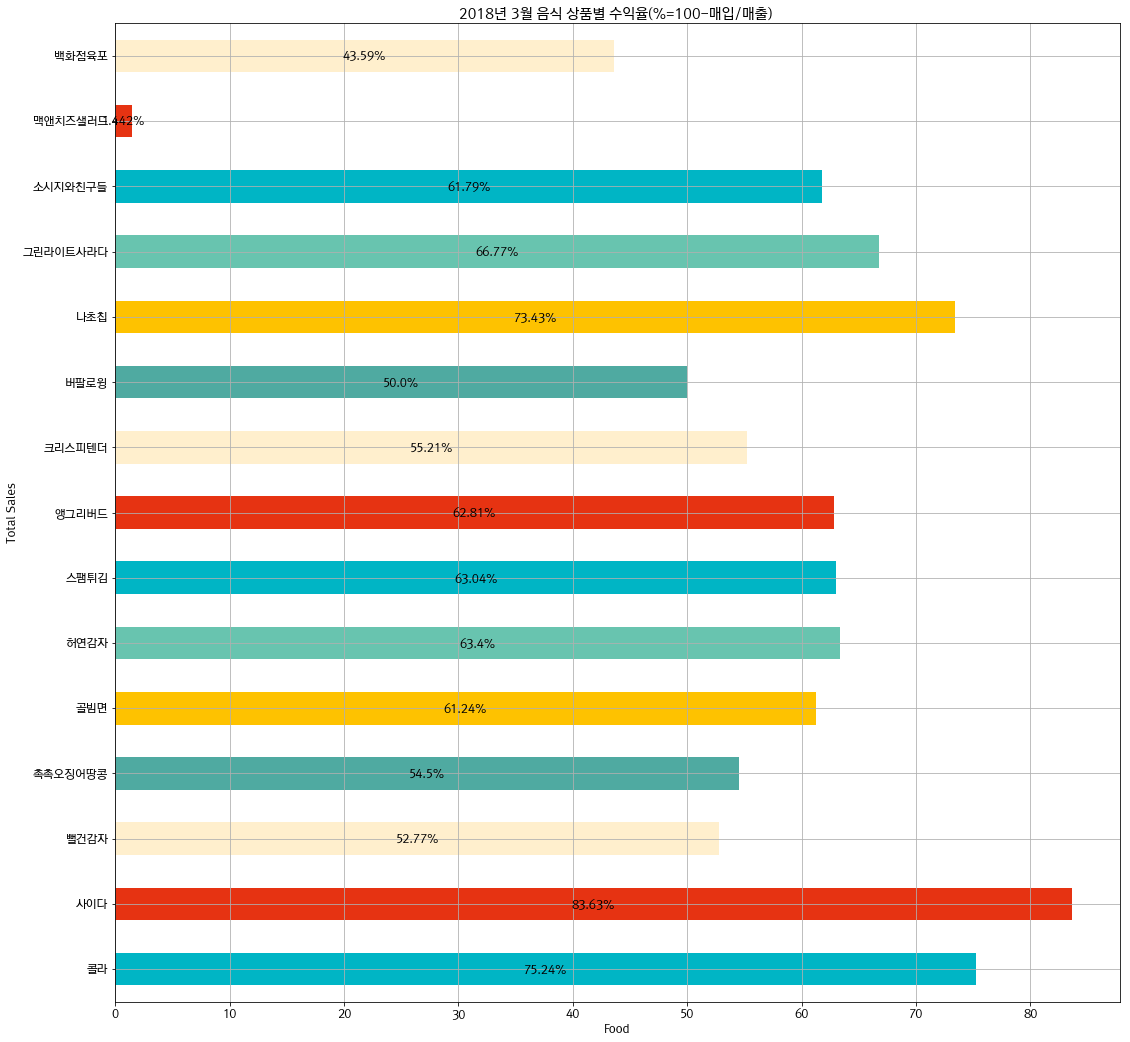

In [25]:
fig = plt.figure()
my_colors = ['#3E8DAC', 'g', '#FEC200','y','#FAC174','#25A2A6','#68C4AF']
my_colors = ['#00B5C5', '#E63312','#FFEFCD','#4FAAA1', '#FEC200','#68C4AF']


ax = DF_food_graph3['prate'].plot.barh(stacked=False, figsize=(18,18), grid=True, colors=my_colors)

plt.rcParams['font.size'] = 12
plt.title(u'{0}년 {1}월 음식 상품별 수익율(%=100-매입/매출) '.format(year_val, mon_val))


ax.set_xlabel('Food')
ax.set_ylabel('Total Sales')

labels = []
for i in DF_food_graph3.index:
        value_str = "{0:.4}%".format(DF_food_graph3.loc[i]['prate']) 
        labels.append(value_str)
#print labels

patches = ax.patches
for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2.-0.01, label, ha='center', va='center', fontsize=12)

fig  = ax.get_figure()
fig.savefig('PNG/{0}/2-2-2-Food-Prate.png'.format(png_save_dir))
plt.show()

# 2.3 Beer Sales/Buy

In [26]:
DFL1 = DF_Lsales.reset_index(drop=True)

In [27]:
sql_stmt = "select sum(amount) from beer where year=2018 and month=3 and cat=21"

cursor = conn_sales.cursor()
cursor.execute(sql_stmt)
tuples = cursor.fetchall()
for t in tuples:
    buy = t[0]

DFL1.loc[0,'Buy'] = buy
DFL1 = DFL1.rename(index={0:'Lager'},columns={'Lager':'Sales'})
DFL1

,Sales,Buy
Lager,7979600,2269000.0


In [28]:
DFL2 = DF_Asales.reset_index(drop=True)
sql_stmt = "select sum(amount) from beer where year=2018 and month=3 and cat=22"

cursor = conn_sales.cursor()
cursor.execute(sql_stmt)
tuples = cursor.fetchall()
for t in tuples:
    buy = t[0]

DFL2.loc[0,'Buy'] = buy
DFL2 = DFL2.rename(index={0:'Ale'}, columns={'Ale':'Sales'})
DFL2

,Sales,Buy
Ale,11987300,4358700.0


In [29]:
DFL = pd.concat([DFL1, DFL2], axis=0)
DFL['Rate'] = DFL['Buy'] / DFL['Sales']  * 100
DFL

,Sales,Buy,Rate
Lager,7979600,2269000.0,28.435009
Ale,11987300,4358700.0,36.360982


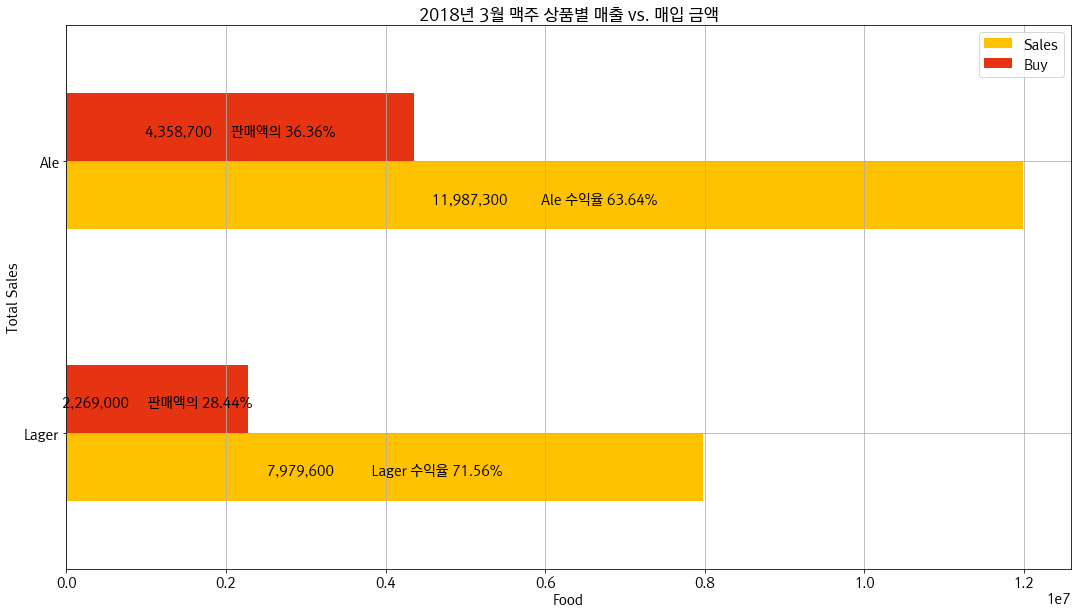

In [38]:
 fig = plt.figure()
#my_colors = ['#3E8DAC', 'g', '#FEC200','y','#FAC174','#25A2A6','#68C4AF']
#my_colors = ['#00B5C5', '#E63312','#FFEFCD','#4FAAA1', '#FEC200','#68C4AF']
my_colors = ['#FEC200','#E63312']


ax = DFL[['Sales','Buy']].plot.barh(stacked=False, figsize=(18,10), grid=True, colors=my_colors)


plt.rcParams['font.size'] = 14
plt.title(u'{0}년 {1}월 맥주 상품별 매출 vs. 매입 금액'.format(year_val, mon_val))


ax.fontsize = 16
ax.set_xlabel('Food')
ax.set_ylabel('Total Sales')

labels = []
for j in DFL[['Sales', 'Buy']].columns:
    for i in DFL.index:
        value_str = u"{:<12,}".format(int(DFL.loc[i][j])) 
        if j == 'Buy':
            value_str += "  "+ u"판매액의 {0:.4}%".format(DFL.loc[i]['Rate'])
        else:
            value_str += "       "+ u"{1} 수익율 {0:.4}%".format(100 - DFL.loc[i]['Rate'], i)
        
        labels.append(value_str)
#print labels

patches = ax.patches
for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2.-0.01, label, ha='center', va='center', fontsize=14)

fig  = ax.get_figure()
fig.savefig('PNG/{0}/2-2-3-Beer-SalesandBuy.png'.format(png_save_dir))
plt.show()